<a href="https://colab.research.google.com/github/lakshayus/Customer-churn-prediction/blob/main/assiggnment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries
import pandas as pd

# Loading the given dataset by SunbaseData
df = pd.read_excel("customer_churn_large_dataset.xlsx")

# Initial data exploration
print(df.info())
print(df.describe())

# Handling missing data
df.dropna(inplace=True)  # Remove rows with missing values

# Handling outliers

# Prepare the data for machine learning
X = df.drop(["CustomerID", "Name", "Churn"], axis=1)  # Features
y = df["Churn"]  # Target variable

# Encode categorical variables using one-hot encoding
X = pd.get_dummies(X, columns=["Gender", "Location"])

# Spliting the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB
None
          CustomerID            Age  Subscription_Length_Months  \
count  100000.000000  100000.000000               100000.000000   
mean    50000.500000      44.027020                 

In [ ]:
# Feature scaling or normalization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [ ]:
# Choose and train a machine learning model (Logistic Regression)
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.50355
Precision: 0.4994683678894205
Recall: 0.3787924604374559
F1 Score: 0.43083978217254226


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_


In [ ]:
# Save the trained model
import joblib

joblib.dump(best_model, 'customer_churn_model.pkl')

# Load the model for making predictions
loaded_model = joblib.load('customer_churn_model.pkl')

# Simulate making predictions on new customer data
new_customer_data = pd.DataFrame({
    'Age': [30],
    'Gender_Female': [0],
    'Gender_Male': [1],
    'Location_Los Angeles': [1],
    'Location_Miami': [0],
    'Location_New York': [0],
    'Location_Chicago': [0],
    'Location_Houston': [0],
    'Subscription_Length_Months': [12],
    'Monthly_Bill': [70.0],
    'Total_Usage_GB': [300]
})

# Ensure the order of columns matches the model's training data
new_customer_data = new_customer_data[X_train.columns]

# Scale the new data
new_customer_data_scaled = scaler.transform(new_customer_data)

# Make predictions
new_customer_churn_prediction = loaded_model.predict(new_customer_data_scaled)
print("New Customer Churn Prediction:", new_customer_churn_prediction)


New Customer Churn Prediction: [0]


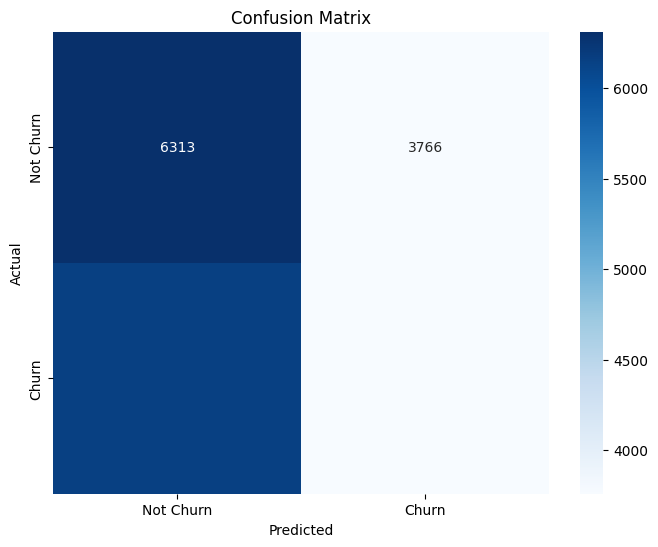

In [ ]:
#Model Performance Metrics and Visualizations
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')  # Save the visualization as an image
plt.show()


In [ ]:
pip install plotly


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import plotly.express as px



# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

# Calculate the Area Under the ROC Curve (AUC-ROC)
roc_auc = roc_auc_score(y_true, y_pred)

# Create a DataFrame for the ROC curve data
roc_df = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr})

# Create an interactive ROC curve plot using Plotly Express
fig = px.line(roc_df, x='False Positive Rate', y='True Positive Rate',
              title=f'ROC Curve (AUC = {roc_auc:.2f})')

# Display the ROC curve
fig.show()


ValueError: ignored